# Load Packages

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from lacbox.io import ReadHAWC2
import matplotlib
import scienceplots


matplotlib.rcParams.update(matplotlib.rcParamsDefault) # TO RESET  PLOTS
plt.style.use(['science'])


# Set global font properties
plt.rcParams['legend.frameon'] = True  # Enable the legend frame
plt.rcParams['legend.fancybox'] = False  # No fancybox, just a regular box
plt.rcParams['legend.edgecolor'] = 'black'  # Black edge color
plt.rcParams['legend.framealpha'] = 1  # No transparency
plt.rcParams['font.size'] = 16
plt.rcParams['font.weight'] = 'normal'

# For viridis of 5 lines

In [22]:
import matplotlib.cm as cm
viridis = cm.get_cmap('viridis_r', 10)  # Get 5 distinct colors from the colormap
linestyles = [
    '-', '-.', '-', '-', '-','-','-','-','-','-'
]

C:\Users\jimwi\AppData\Local\Temp\ipykernel_8164\3662053547.py:2: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  viridis = cm.get_cmap('viridis_r', 10)  # Get 5 distinct colors from the colormap


### ZOOM-IN

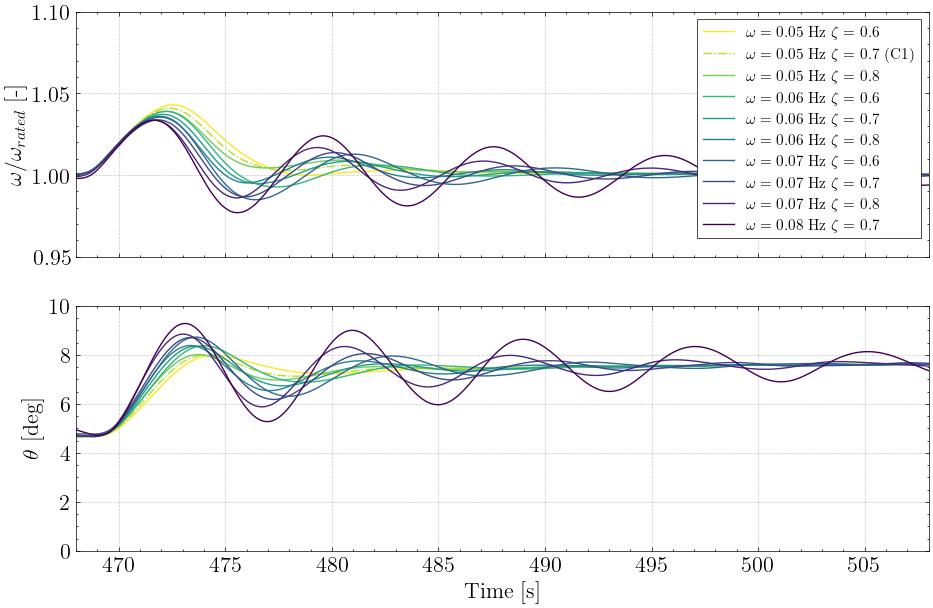

In [23]:
import os
import glob

# Directory containing the files
res_dir = '../res'

# File pattern to match
file_pattern = os.path.join(res_dir, 'Jim_Design_step_*.hdf5')

# Automatically find all matching files
file_names = glob.glob(file_pattern)

# Function to generate labels from file names
def generate_label(filename):
    # Extract relevant parts from the filename
    base_name = os.path.basename(filename)  # e.g., 'Jim_Design_step_0.05_0.6.hdf5'
    parts = base_name.replace('Jim_Design_step_', '').replace('.hdf5', '').split('_')
    omega = parts[0]  # e.g., '0.05'
    zeta = parts[1]   # e.g., '0.6'

    # Generate the label string
    label = fr'$\omega={omega}$ Hz $\zeta={zeta}$'
    
    # Add special label for the unique case
    if omega == '0.05' and zeta == '0.7':
        label += ' (C1)'

    return label

# Generate labels for all files
labels = [generate_label(fname) for fname in file_names]


# # List of file names (adjust the paths as necessary)
# file_names = [
#     '../res/Jim_Design_C1.hdf5',
#     '../res/Jim_Design_step_0.05_0.6.hdf5',
#     '../res/Jim_Design_step_0.05_0.8.hdf5',
#     '../res/Jim_Design_step_0.06_0.6.hdf5',
#     '../res/Jim_Design_step_0.06_0.7.hdf5',
#     '../res/Jim_Design_step_0.06_0.8.hdf5',
#     '../res/Jim_Design_step_0.07_0.7.hdf5',
#     '../res/Jim_Design_step_0.08_0.7.hdf5',
# ]
# 
# labels = [
#     r'$\omega=0.05$ Hz $\zeta=0.7$ (C1)',
#     r'$\omega=0.05$ Hz $\zeta=0.6$',
#     r'$\omega=0.05$ Hz $\zeta=0.8$',
#     r'$\omega=0.06$ Hz $\zeta=0.6$',
#     r'$\omega=0.06$ Hz $\zeta=0.7$',
#     r'$\omega=0.06$ Hz $\zeta=0.8$',
#     r'$\omega=0.07$ Hz $\zeta=0.7$',
#     r'$\omega=0.08$ Hz $\zeta=0.7$',
# ]

savename = '../Plots/Control_paramers_step_sim.pdf'

# For Non-Dim
omega_rated = 8.83226921
x_start, x_end = (468, 508)

# Initialize lists to store variables
wsp_data = []
omega_data = []
pitch_data = []
pelec_data = []
time_data = []

# Loop through all files to read the data and get the relevant indices
for fname in file_names:
    # h2res_data, h2res_chaninfo, h2res_time = ReadHAWC2(fname)
    # names, _, _ = h2res_chaninfo

    h2res = ReadHAWC2(fname)
    names, _, _ = h2res.chaninfo

    # Extract indexes based on names
    wsp_idx = np.where(['WSP gl. coo.,Vy' in name for name in names])[0]
    omega_idx = np.where(['Omega' in name for name in names])[0]
    pitch_idx = np.where(['DLL inp   4:   1' in name for name in names])[0]
    pelec_idx = np.where(['DLL inp   2:   2' in name for name in names])[0]
    
    # Append relevant data for each variable
    wsp_data.append(h2res.data[:, wsp_idx])
    omega_data.append(h2res.data[:, omega_idx] * 60/(2*np.pi))
    pitch_data.append(h2res.data[:, pitch_idx] * 180/np.pi)
    pelec_data.append(h2res.data[:, pelec_idx] / 1e6)
    time_data.append(h2res.t)

# Create subplots with shared x-axis
fig, axs = plt.subplots(2, 1, sharex='all', figsize=(11, 7))

# Plot Omega on the second subplot
for i, (omega, t) in enumerate(zip(omega_data, time_data)):
    axs[0].plot(t, omega/omega_rated, color=viridis(i), linestyle=linestyles[i])
axs[0].set_ylabel(r'$\omega/\omega_{rated}$ [-]')
axs[0].set_xlim(left=x_start, right=x_end)
axs[0].set_ylim(0.95, 1.1)
axs[0].grid(linestyle='--', linewidth=0.5, alpha=0.7)

# Plot Pitch on the third subplot
for i, (pitch, t) in enumerate(zip(pitch_data, time_data)):
    axs[1].plot(t, pitch, color=viridis(i), linestyle=linestyles[i])
axs[1].set_ylabel(r'$\theta$ [deg]')
axs[1].set_xlim(left=x_start, right=x_end)
axs[1].set_ylim(0, 10)
axs[1].grid(linestyle='--', linewidth=0.5, alpha=0.7)

# Legend
legend = axs[0].legend(labels=labels, fancybox=False, edgecolor="black", fontsize=11, loc='upper right')
legend.get_frame().set_linewidth(0.5)

# Set common labels
plt.xlabel('Time [s]')
plt.savefig(savename, dpi=300, bbox_inches='tight')

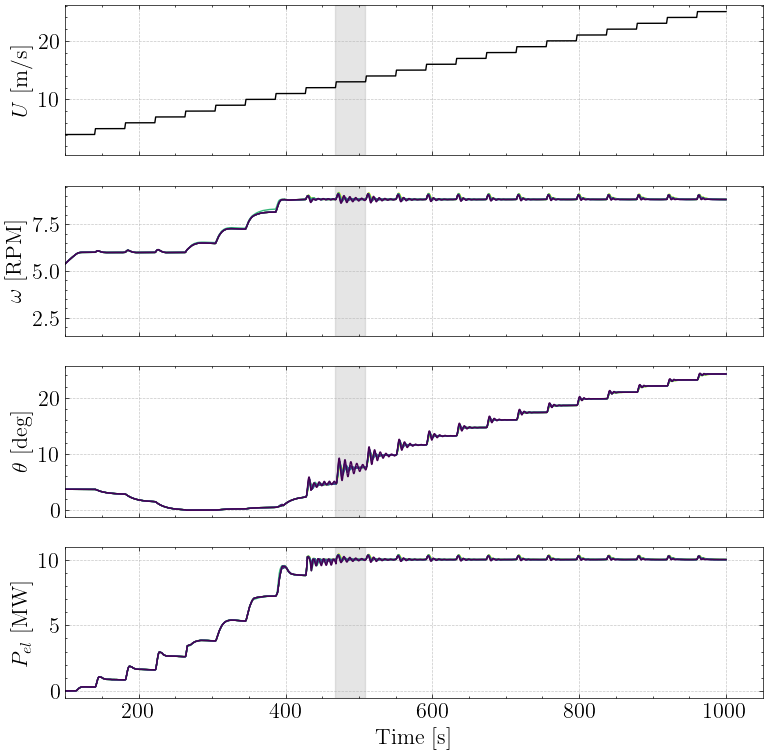

In [25]:
# Directory containing the files
res_dir = '../res'

# File pattern to match
file_pattern = os.path.join(res_dir, 'Jim_Design_step_*.hdf5')

# Automatically find all matching files
file_names = glob.glob(file_pattern)

# Function to generate labels from file names
def generate_label(filename):
    # Extract relevant parts from the filename
    base_name = os.path.basename(filename)  # e.g., 'Jim_Design_step_0.05_0.6.hdf5'
    parts = base_name.replace('Jim_Design_step_', '').replace('.hdf5', '').split('_')
    omega = parts[0]  # e.g., '0.05'
    zeta = parts[1]   # e.g., '0.6'

    # Generate the label string
    label = fr'$\omega={omega}$ Hz $\zeta={zeta}$'
    
    # Add special label for the unique case
    if omega == '0.05' and zeta == '0.7':
        label += ' (C1)'

    return label

# Generate labels for all files
labels = [generate_label(fname) for fname in file_names]

# # List of file names (adjust the paths as necessary)
# file_names = [
#     '../res/Jim_Design_step_0.05_0.6.hdf5',
#     '../res/Jim_Design_step_0.05_0.8.hdf5',
#     '../res/Jim_Design_step_0.06_0.6.hdf5',
#     '../res/Jim_Design_step_0.06_0.7.hdf5',
#     '../res/Jim_Design_step_0.06_0.8.hdf5',
#     '../res/Jim_Design_step_0.07_0.7.hdf5',
#     '../res/Jim_Design_step_0.08_0.7.hdf5',
# ]
# 
# labels = [
#     r'$\omega=0.05$ Hz $\zeta=0.6$',
#     r'$\omega=0.05$ Hz $\zeta=0.8$',
#     r'$\omega=0.06$ Hz $\zeta=0.6$',
#     r'$\omega=0.06$ Hz $\zeta=0.7$ (C1)',
#     r'$\omega=0.06$ Hz $\zeta=0.8$',
#     r'$\omega=0.07$ Hz $\zeta=0.7$',
#     r'$\omega=0.08$ Hz $\zeta=0.7$',
# ]

savename = '../Plots/zoom_out.pdf'

# Shading
x_start, x_end = (468, 508)

# Initialize lists to store variables
wsp_data = []
omega_data = []
pitch_data = []
pelec_data = []
time_data = []

# Loop through all files to read the data and get the relevant indices
for fname in file_names:
    # h2res_data, h2res_chaninfo, h2res_time = ReadHAWC2(fname)
    # names, _, _ = h2res_chaninfo

    h2res = ReadHAWC2(fname)
    names, _, _ = h2res.chaninfo

    # Extract indexes based on names
    wsp_idx = np.where(['WSP gl. coo.,Vy' in name for name in names])[0]
    omega_idx = np.where(['Omega' in name for name in names])[0]
    pitch_idx = np.where(['DLL inp   4:   1' in name for name in names])[0]
    pelec_idx = np.where(['DLL inp   2:   2' in name for name in names])[0]
    
    # Append relevant data for each variable
    wsp_data.append(h2res.data[:, wsp_idx])
    omega_data.append(h2res.data[:, omega_idx] * 60/(2*np.pi))
    pitch_data.append(h2res.data[:, pitch_idx] * 180/np.pi)
    pelec_data.append(h2res.data[:, pelec_idx] / 1e6)
    time_data.append(h2res.t)

# Create subplots with shared x-axis
fig, axs = plt.subplots(4, 1, sharex='all', figsize=(9, 9))

# Plot WSP on the first subplot
# for wsp, t in zip(wsp_data, time_data):
axs[0].plot(time_data[0], wsp_data[0], 'k')
axs[0].axvspan(x_start, x_end, color='gray', alpha=0.2)
axs[0].set_ylabel(r'$U$ [m/s]')
axs[0].set_xlim(left=100)
axs[0].grid(linestyle='--', linewidth=0.5, alpha=0.7)

# Plot Omega on the second subplot
for i, (omega, t) in enumerate(zip(omega_data, time_data)):
    axs[1].plot(t, omega, color=viridis(i))
axs[1].axvspan(x_start, x_end, color='gray', alpha=0.2)
axs[1].set_ylabel(r'$\omega$ [RPM]')
axs[1].set_xlim(left=100)
axs[1].grid(linestyle='--', linewidth=0.5, alpha=0.7)

# Plot Pitch on the third subplot
for i, (pitch, t) in enumerate(zip(pitch_data, time_data)):
    axs[2].plot(t, pitch, color=viridis(i))
axs[2].axvspan(x_start, x_end, color='gray', alpha=0.2)
axs[2].set_ylabel(r'$\theta$ [deg]')
axs[2].set_xlim(left=100)
axs[2].grid(linestyle='--', linewidth=0.5, alpha=0.7)


# Plot P_elec on the fourth subplot
for i, (pelec, t) in enumerate(zip(pelec_data, time_data)):
    axs[3].plot(t, pelec, color=viridis(i))
# axs[3].axvspan(x_start, x_end, color='gray', alpha=0.2)
axs[3].axvspan(x_start, x_end, color='gray', alpha=0.2,zorder=0)
axs[3].set_ylabel(r'$P_{el}$ [MW]')
axs[3].set_xlim(left=100)
axs[3].grid(linestyle='--', linewidth=0.5, alpha=0.7, zorder=-1)  

# Legend
# legend = axs[2].legend(labels=labels, fancybox=False, edgecolor="black", fontsize=12, loc='upper right')
# legend.get_frame().set_linewidth(0.5)
# legend.set_zorder(1000)  # Set a higher zorder for the legend

# Legend on the side of the figure
# legend = axs[2].legend(
#     labels=labels, 
#     fancybox=False, 
#     edgecolor="black", 
#     fontsize=12, 
#     loc='center left', 
#     bbox_to_anchor=(1.05, 0.5),  # Position legend to the right of the subplot
#     borderaxespad=0
# )
# legend.get_frame().set_linewidth(0.5)


# Set common labels
plt.xlabel('Time [s]')
plt.savefig(savename, dpi=300, bbox_inches='tight')